# Data

In [74]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-white')

y = pd.read_csv(r'/kaggle/input/titanic/gender_submission.csv')
X_sub = pd.read_csv(r'/kaggle/input/titanic/test.csv')
X = pd.read_csv(r'/kaggle/input/titanic/train.csv')

X = X.astype({'Sex':'category', 'Embarked':'category', 'Pclass':'category'})
X_sub = X_sub.astype({'Sex':'category', 'Embarked':'category'})
X['Embarked'].cat.rename_categories({'Q':'Queenstown', 'S':'Southhampton ', 'C':'Cherbourg'}, inplace=True)

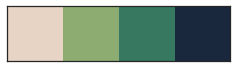

In [2]:
sns.set_palette(sns.cubehelix_palette(4, start=.1, rot=-.75))
current_palette = sns.color_palette()
sns.palplot(current_palette)

In [3]:
y.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [4]:
print( X.info())
X.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    category
dtypes: category(3), float64(2), int64(4), object(3)
memory usage: 65.7+ KB
None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,Southhampton
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southhampton
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Southhampton
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,Southhampton


In [5]:
def missing_values(df):
        
    ixn = X.isnull().sum()
    ixnp = X.isnull().mean() * 100
    #display
    
ixn = X.isnull().sum()
incn = X_sub.isnull().sum()

'Missing values in train dataset:' , ixn[ixn>0], 'Missing values in test dataset:', incn[incn>0]

('Missing values in train dataset:',
 Age         177
 Cabin       687
 Embarked      2
 dtype: int64,
 'Missing values in test dataset:',
 Age       86
 Fare       1
 Cabin    327
 dtype: int64)

In [6]:
'''!pip install pandas-profiling
from pandas_profiling import ProfileReport
ProfileReport(X, title='Titanic dataset').to_widgets()'''

"!pip install pandas-profiling\nfrom pandas_profiling import ProfileReport\nProfileReport(X, title='Titanic dataset').to_widgets()"

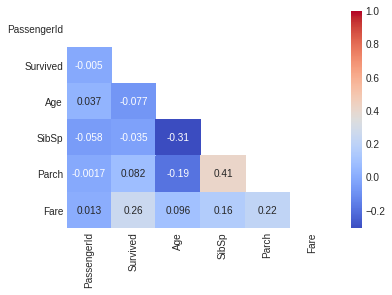

In [7]:
def corrplot(df):
    corr = df.corr()  # corr matrix is good 
    sns.heatmap(corr, mask=np.triu(np.ones_like(corr, dtype=np.bool)),
     annot=True, cmap='coolwarm')
corrplot(X)

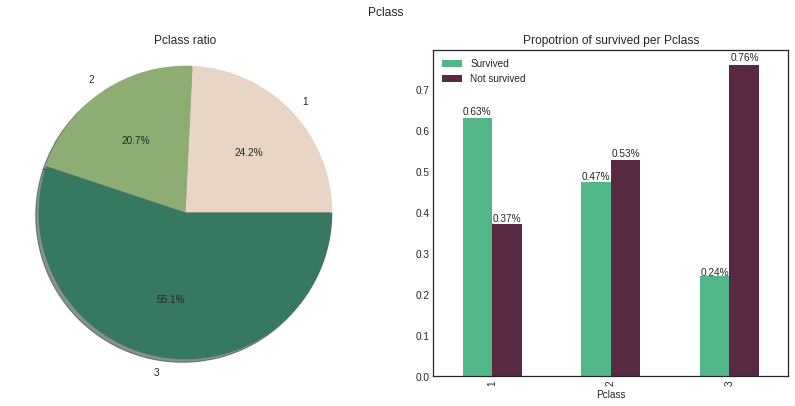

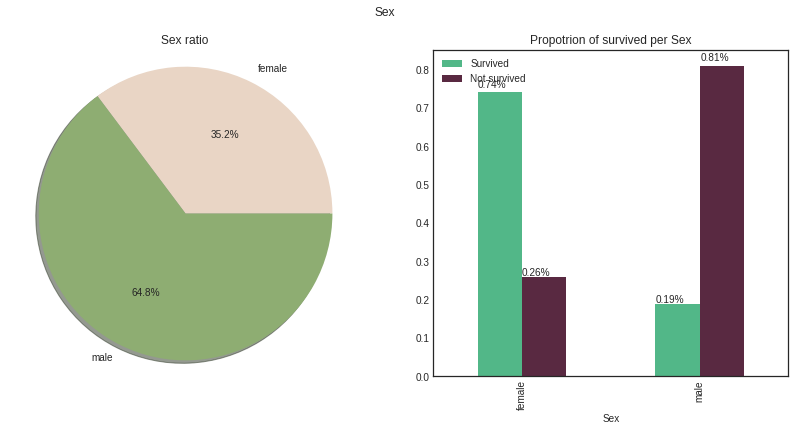

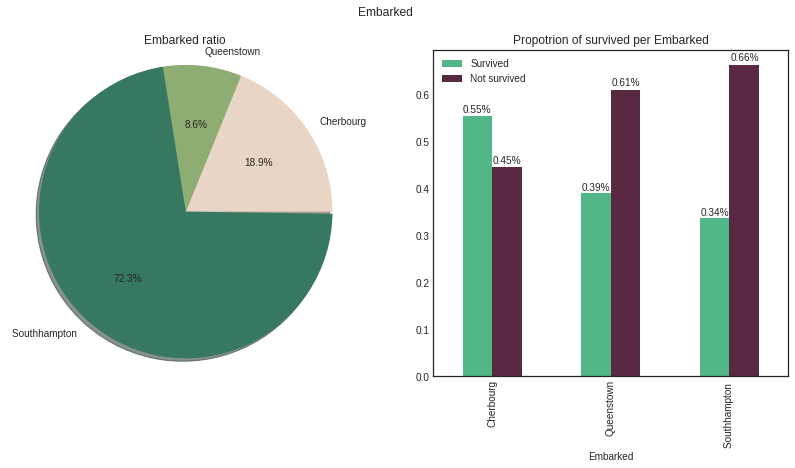

[None, None, None]

In [8]:
cat_cols = X.select_dtypes(include='category')

def plot_col_info2surv(column):
    n = X.shape[0]
    plt.rcParams['figure.figsize'] = (14, 6)
    if (X[column].dtype == 'category'):
        data = X.loc[:,['Survived', column]]
        perc = data.groupby(column).count() / n

        fig, (ax1, ax2) = plt.subplots(ncols=2)
        fig.suptitle(column)
        ax1.pie(perc.values.reshape(-1), # matplot doesnt like column vector, so rehspae it into column
                labels=perc.index,
                autopct='%1.1f%%', shadow=True,)
        ax1.axis('equal')
        ax1.set_title(column + ' ratio')
        
        surv_rate = data.groupby(column).mean() 
        surv_rate['Not survived'] = 1 - surv_rate['Survived']
        surv_rate.plot(kind='bar', ax=ax2, color=['#52B788', '#592941'])
        for p in ax2.patches:
            ax2.annotate(f'{p.get_height():.2f}%', (p.get_x() * 1.005, p.get_height() * 1.015))
        ax2.set_title('Propotrion of survived per ' + column)    
        plt.show()
    
    
[plot_col_info2surv(col) for col in cat_cols]
#plot_col_info2surv('Embarked')

Plot histograms for Age column
Check age column. It have a missing values so i will plot with imputed values

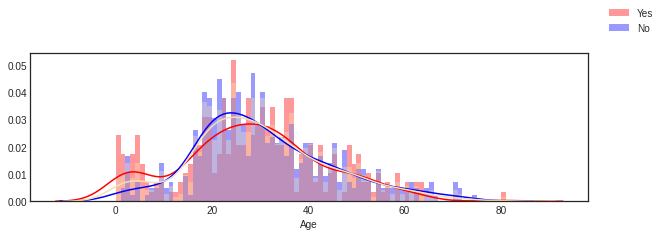

In [9]:
#sns.distplot(X.loc[:,'Age'])
def plot_num_col(column):
    fig = plt.figure(figsize=(10,6))
    ax1 = fig.add_subplot(211)
    bins = range(0,89,1)
    sns.distplot(X.loc[X['Survived'] == 1, column], bins=bins, color='r', ax=ax1)
    sns.distplot(X.loc[X['Survived'] == 0, column], bins=bins, color='b', ax=ax1)
    sns.distplot(X.loc[:, column], bins=bins, color='#f5deb3',ax=ax1)

    '''nX = X.copy()
    fill_value = nX[column].mode() # I tried mode median and mean. And turns out that mode have least effect on data, which is good
    nX[column].fillna(fill_value, inplace=True)
    ax2 = fig.add_subplot(212)
    sns.distplot(nX.loc[nX['Survived'] == 1, column], bins=bins, color='r', ax=ax2)
    sns.distplot(nX.loc[nX['Survived'] == 0, column], bins=bins, color='b', ax=ax2)

    sns.distplot(nX.loc[:, column], bins=bins, color='#f5deb3',ax=ax2)'''
    fig.legend(['Yes', 'No'])
plot_num_col('Age')

Data have a lot of survived babies. I dont really like  kids, so I'll just remove

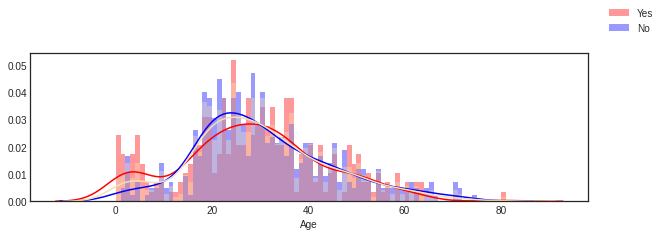

In [10]:
plot_num_col('Age')

Check remaining columns

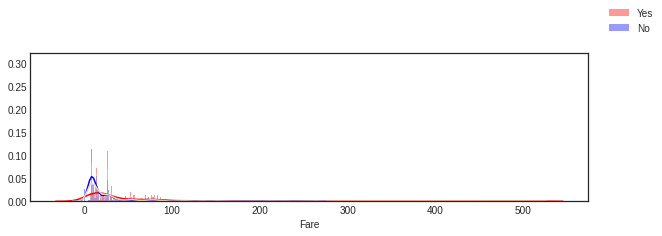

In [11]:
plot_num_col('Fare') # scale

In [12]:
X['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [13]:
X['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [14]:
X_ = X.copy()
X_['FamilyS'] = X_['SibSp'] + X_['Parch']

X_['FamilyS'].value_counts()

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: FamilyS, dtype: int64

In [15]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder


from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [16]:
'''age_features = ['Age']
age_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('scaler', StandardScaler()),
])

numeric_features = num_cols[2:]
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('threshold', FunctionTransformer(lambda x: np.clip(x,0,3))),

])

category_features = cat_cols
category_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')), # 
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('age', age_transformer, age_features),
        ('num', numeric_transformer, numeric_features),
        ('cat', category_transformer, category_features),
    ])'''

"age_features = ['Age']\nage_transformer = Pipeline(steps=[\n    ('imputer', SimpleImputer(strategy='most_frequent')),\n    ('scaler', StandardScaler()),\n])\n\nnumeric_features = num_cols[2:]\nnumeric_transformer = Pipeline(steps=[\n    ('imputer', SimpleImputer(strategy='most_frequent')),\n    ('threshold', FunctionTransformer(lambda x: np.clip(x,0,3))),\n\n])\n\ncategory_features = cat_cols\ncategory_transformer = Pipeline(steps=[\n    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')), # \n    ('onehot', OneHotEncoder(handle_unknown='ignore'))])\n\npreprocessor = ColumnTransformer(\n    transformers=[\n        ('age', age_transformer, age_features),\n        ('num', numeric_transformer, numeric_features),\n        ('cat', category_transformer, category_features),\n    ])"

In [75]:
#based on https://www.kaggle.com/saadmuhammad17/a-beginners-guide-to-data-science-top-3

def init_pipe(x):
    print('Creating copy of dataframe')
    return x.copy()
    
    
def get_title(x, treshold=20):
    print('Excracting titles from names')
    xname = x['Name']
    title = xname.map(lambda a: a.split(',')[1].split('.')[0]) # excract title. Between , and .
    x['Title'] = title.astype('category')
    x['Title'].cat.add_categories(['other'],inplace=True)
    treshold_titles = x['Title'].value_counts() > treshold
    treshold_titles = treshold_titles[treshold_titles].index
    
    other_i = ~x['Title'].isin(treshold_titles) 
    x.loc[other_i,'Title'] = 'other'
    
    
    after = x['Title'].value_counts().sum()
    return x

def impute_age(x):
    print('Imputing Age')
    age_mode = x.groupby(['Pclass','Sex']).agg(lambda x:x.value_counts().index[0])['Age']
    
    x['Age_imputed'] = x['Age']
    
    nullage_i = x['Age'].isnull()
    x.loc[nullage_i,'Age_imputed'] = x.loc[nullage_i].apply(lambda row: float(age_mode.loc[(row['Pclass'],row['Sex'])]), axis=1)
    return x

def scale_cols(x, colums):
    return x# .apply(lambda col: (col - col.mean() / col.std() if col.name in columns) ,axis=1)

def bucket_cols(x, columns=['Fare','Age_imputed'], bins=[5]):
    if len(bins) == 1:
        bins = bins * len(columns)
    print(f'Segmenting {columns} columns into {bins} bins respectfully')
    assert len(bins) == (len(columns)) , 'Number of bins should be set for each column or set as scalar'
    
    for column, bin_ in zip(columns,bins):
        x[column+'_bin'] = pd.qcut(x[column], bin_, labels=range(bin_))
    
    return x

def drop_columns(x, dropcols):
    print(f'Droping {dropcols} columns')
    x.drop(dropcols, axis=1, inplace=True)
    return x
    
def get_familysize(x):
    print('Caclulating family size column')
    x['Family_size'] = x['SibSp'] + x['Parch'] + 1
    return x
    
def get_alone(x):
    print('Caclulating alone column')
    assert 'Family_size' in x.columns, 'calculate family size first'
    x['Alone'] = x['Family_size'].map(lambda v: 0 if v>1 else 1)
    return x
 
def label_cat(x):
    cat_cols = x.select_dtypes(include='category').columns
    for cat_col in cat_cols:
        x[cat_col] = x[cat_col].cat.remove_unused_categories().cat.codes
    return x


columns2drop = ['Name', 'Ticket', 'Cabin', 'PassengerId', 'Age', 'Age_imputed','Fare', 'SibSp', 'Parch']
    


def compose_pipe(df):
    return df \
        .pipe(init_pipe)\
        .pipe(get_title,)\
        .pipe(impute_age)\
        .pipe(bucket_cols, bins=[8])\
        .pipe(get_familysize)\
        .pipe(get_alone)\
        .pipe(label_cat)\
        .pipe(drop_columns, columns2drop)

pX = compose_pipe(X)

pX.head()

Creating copy of dataframe
Excracting titles from names
Imputing Age
Segmenting ['Fare', 'Age_imputed'] columns into [8, 8] bins respectfully
Caclulating family size column
Caclulating alone column
Droping ['Name', 'Ticket', 'Cabin', 'PassengerId', 'Age', 'Age_imputed', 'Fare', 'SibSp', 'Parch'] columns


,Survived,Pclass,Sex,Embarked,Title,Fare_bin,Age_imputed_bin,Family_size,Alone
0,0,2,1,2,2,0,2,2,0
1,1,0,0,0,3,7,6,2,0
2,1,2,0,2,1,2,4,1,1
3,1,0,0,2,3,6,5,2,0
4,0,2,1,2,2,2,5,1,1


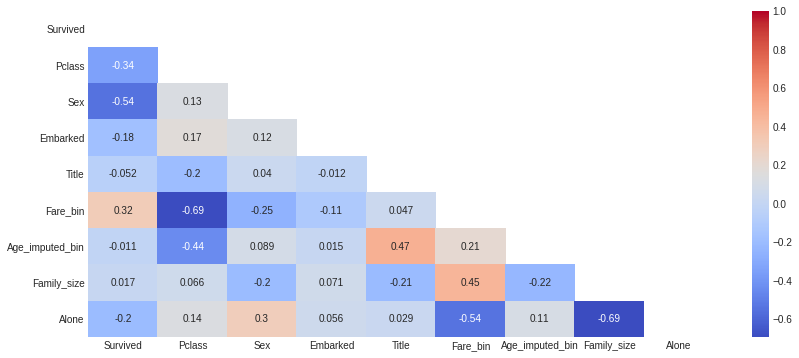

In [55]:
corrplot(pX)

In [56]:
y = pX['Survived']
pX.drop('Survived', axis=1, inplace=True)

In [57]:
X_train, X_test, y_train, y_test = train_test_split(pX, y, test_size=0.2, random_state=8)

# Models

In [58]:
rfor = RandomForestClassifier(n_estimators=100, random_state=8)
rfor.fit(X_train, y_train)
rfor.score(X_test, y_test)

# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html

0.8044692737430168

In [59]:
'''#can we do better?
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from pprint import pprint
#https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 750, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier(random_state=8)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=8, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)'''

"#can we do better?\nfrom sklearn.model_selection import RandomizedSearchCV, GridSearchCV\nfrom pprint import pprint\n#https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74\n\n# Number of trees in random forest\nn_estimators = [int(x) for x in np.linspace(start = 50, stop = 750, num = 10)]\n# Number of features to consider at every split\nmax_features = ['auto', 'sqrt']\n# Maximum number of levels in tree\nmax_depth = [int(x) for x in np.linspace(10, 110, num = 11)]\nmax_depth.append(None)\n# Minimum number of samples required to split a node\nmin_samples_split = [2, 5, 10]\n# Minimum number of samples required at each leaf node\nmin_samples_leaf = [1, 2, 4]\n# Method of selecting samples for training each tree\nbootstrap = [True, False]\n\n# Create the random grid\nrandom_grid = {'n_estimators': n_estimators,\n               'max_features': max_features,\n               'max_depth': max_depth,\n               'min_samples_spli

In [60]:
#rf_random.best_params_

In [61]:
best_params = {'n_estimators': 440,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 80,
 'bootstrap': True}

score1 = rfor.score(X_test, y_test)

better_rfor = RandomForestClassifier(**best_params)
better_rfor.fit(X_train, y_train)
score2 = better_rfor.score(X_test, y_test)
print('base model score:', f'{score1*100:.1f}%', '\nbetter model score:', f'{score2*100:.1f}%', '\ndifference', f'{(score2-score1)*100:.1f}%')
#not bad heh

base model score: 80.4% 
better model score: 81.0% 
difference 0.6%


In [62]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(better_rfor.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

,importance
feature,
Sex,0.281
Title,0.160
Fare_bin,0.152
Age_imputed_bin,0.138
Pclass,0.114
Family_size,0.090
Embarked,0.046
Alone,0.019


# CatBoost


In [63]:
from catboost import CatBoostClassifier, Pool, cv
from sklearn.metrics import accuracy_score

In [64]:
cat = CatBoostClassifier(
    custom_loss=['Accuracy'],
    random_seed=42,
    logging_level='Silent',
)

In [65]:
X_train, X_val, y_train, y_val = train_test_split(pX, y, test_size=0.2, random_state=8)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.25, random_state=8)

In [66]:
cat.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    #logging_level='Verbose',  # you can uncomment this for text output
    plot=False
);

In [67]:
train_pool = Pool(X_train, y_train)
validate_pool = Pool(X_val, y_val)
test_pool = Pool(X_test, y_test)

params = {
    'iterations': 500,
    'learning_rate': 0.1,
    'eval_metric': 'Accuracy',
    'random_seed': 42,
    'logging_level': 'Silent',
    'use_best_model': True,
    'od_type': 'Iter',
    'od_wait': 60,
}

In [68]:
model = CatBoostClassifier(**params)
model.fit(train_pool, eval_set=validate_pool, plot=True);

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [69]:
feature_importances = model.get_feature_importance(train_pool)
feature_names = X_train.columns
for score, name in sorted(zip(feature_importances, feature_names), reverse=True):
    print('{}: {}'.format(name, score))

Sex: 49.787949853024315
Pclass: 19.76313978165798
Fare_bin: 9.49438826905479
Title: 6.3635478968654065
Age_imputed_bin: 5.3824860617493675
Family_size: 4.699217853439167
Embarked: 4.056565100061149
Alone: 0.45270518414782096


In [70]:
accuracy_score(y_test, model.predict(X_test))

0.8595505617977528

# Predict submission 

In [71]:
#preprocess output data
'''X_val_index = X_val['PassengerId']
X_val.drop(drop_cols,axis=1, inplace=True)
X_val['FamilyS'] = X_val['SibSp'] + X_val['Parch']

X_val.drop(['SibSp', 'Parch'], axis=1, inplace=True)'''
X_sub_index = X_sub['PassengerId']
X_sub_m = compose_pipe(X_sub)

Creating copy of dataframe
Excracting titles from names
Imputing Age
Segmenting ['Fare', 'Age_imputed'] columns into [8, 8] bins respectfully
Caclulating family size column
Caclulating alone column
Droping ['Name', 'Ticket', 'Cabin', 'PassengerId', 'Age', 'Age_imputed', 'Fare', 'SibSp', 'Parch'] columns


In [72]:
predictions = model.predict(X_sub_m) 
result = pd.DataFrame(zip(X_sub_index,predictions), columns=['PassengerId', 'Survived'])
result.to_csv('submission0.csv', index=False)
result.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
